In [18]:
# импорт необходимых библиотек

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [55]:
# загрузка файлов

ratings = pd.read_csv("ml-latest-small/ratings.csv")
tags= pd.read_csv("ml-latest-small/tags.csv")
movies = pd.read_csv("ml-latest-small/movies.csv")

In [38]:
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [39]:
ratings

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [56]:
# джойним / мержим два датафрейма
# ссылка на документацию: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html

movies = movies.merge(ratings, on = 'movieId', how = 'inner')

In [41]:
len(movies)

100836

In [42]:
movies.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483


In [43]:
movies['title'].value_counts()

Forrest Gump (1994)                                                  329
Shawshank Redemption, The (1994)                                     317
Pulp Fiction (1994)                                                  307
Silence of the Lambs, The (1991)                                     279
Matrix, The (1999)                                                   278
                                                                    ... 
Only Old Men Are Going to Battle (V boy idut odni stariki) (1973)      1
I'm the One That I Want (2000)                                         1
Maniac (2012)                                                          1
Bikini Beach (1964)                                                    1
The Stanford Prison Experiment (2015)                                  1
Name: title, Length: 9719, dtype: int64

In [60]:
# создаем новый dataframe в который кладем количество отзывов по каждому фильму

top_rated=pd.DataFrame(movies.groupby('title').size().sort_values(ascending=False))

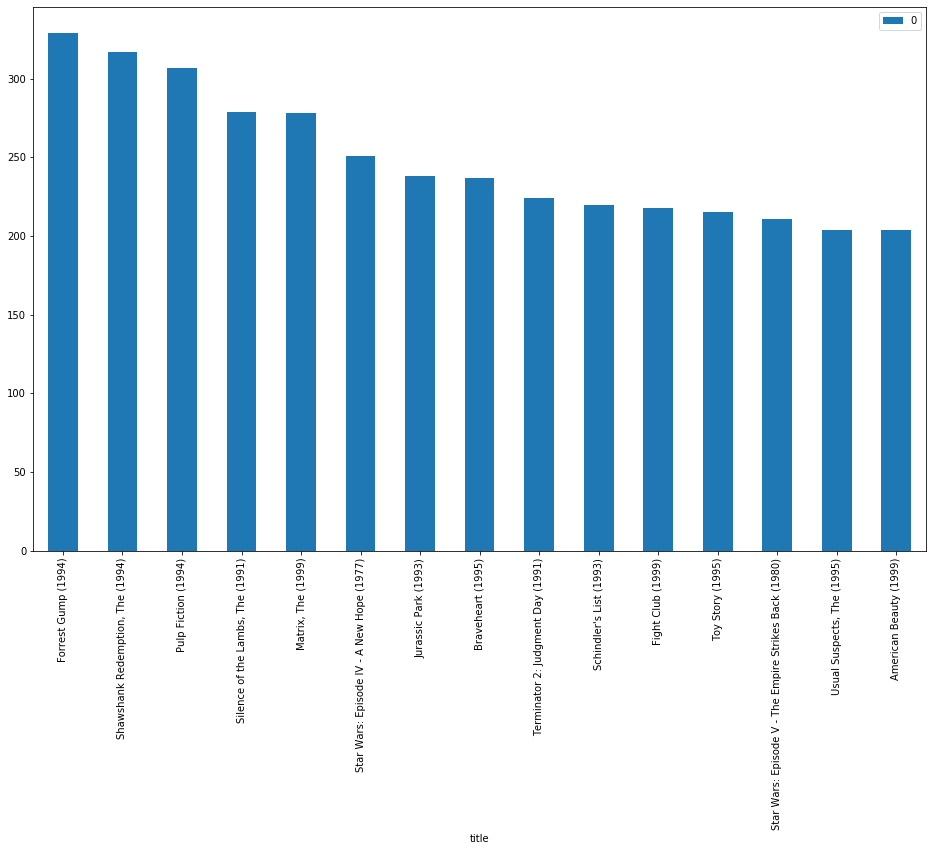

In [61]:
top_rated[:15].plot(kind='bar', figsize=(16,10))

In [62]:
# снова присоединяем новую информацию в исходный датафрейм
movies=movies.merge(top_rated, on='title',how='inner')
movies.head()

,movieId,title,genres,userId,rating,timestamp,0
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,215
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962,215
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946,215
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970,215
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483,215


In [63]:
# фильтруем только те фильмы, у которых больтше 100 оценок
top_movies = movies.loc[movies[0]>100]

In [64]:
# выводим фильмы с самым большим рейтингом
high_rated=top_movies.groupby('title')['rating'].mean().sort_values(ascending=False)
high_rated.head(20)

title
Shawshank Redemption, The (1994)                                                  4.429022
Godfather, The (1972)                                                             4.289062
Fight Club (1999)                                                                 4.272936
Godfather: Part II, The (1974)                                                    4.259690
Departed, The (2006)                                                              4.252336
Goodfellas (1990)                                                                 4.250000
Dark Knight, The (2008)                                                           4.238255
Usual Suspects, The (1995)                                                        4.237745
Princess Bride, The (1987)                                                        4.232394
Star Wars: Episode IV - A New Hope (1977)                                         4.231076
Schindler's List (1993)                                                           4.

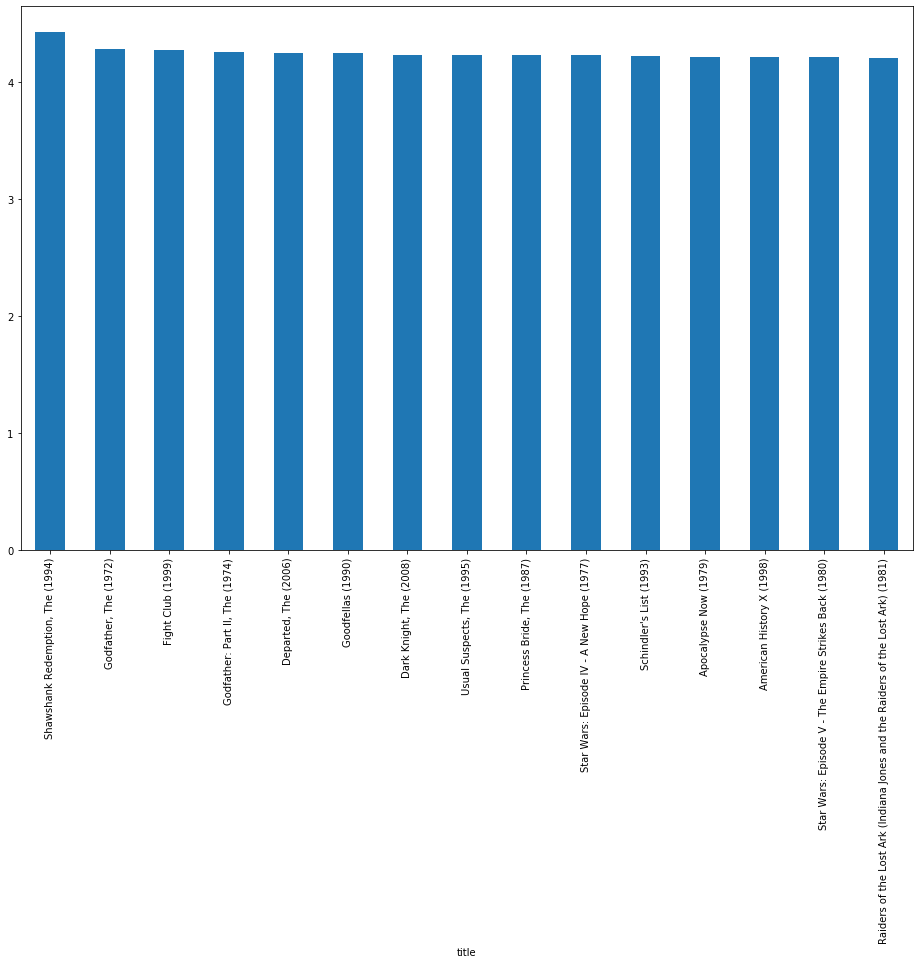

In [65]:
high_rated[:15].plot(kind='bar', figsize=(16,10))